#Data Set Read

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/breast_cancer_dataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Preprocessing

In [ ]:
X = df.drop(["diagnosis", "id"], axis=1)
y = df['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def one_hot_encode(labels):
    num_classes = len(labels.unique())
    one_hot_labels = pd.get_dummies(labels, columns=labels.name, drop_first=False)
    return one_hot_labels

def convert_labels_to_numeric(labels):
    return labels.map({'B': 0, 'M': 1})

In [ ]:
def preprocess_cancer_data(X, y):
    y_numeric = one_hot_encode(y)

    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    return X_normalized, y_numeric

In [ ]:
X, y = preprocess_cancer_data(X, y)
print(X)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#Train-Test-Split

In [ ]:
def split_data(X, y, test_size=0.2, random_state=None):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

#Neural Network

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    hidden_weights = np.random.randn(input_size, hidden_size)
    hidden_biases = np.zeros((1, hidden_size))
    output_weights = np.random.randn(hidden_size, output_size)
    output_biases = np.zeros((1, output_size))

    return hidden_weights, hidden_biases, output_weights, output_biases

In [ ]:
def forward_propagation(X, hidden_weights, hidden_biases, output_weights, output_biases):
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_biases
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_biases
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output, output_layer_output

In [ ]:
def backpropagation(X, y, hidden_layer_output, output_layer_output, hidden_weights, hidden_biases, output_weights, output_biases, learning_rate):
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_error = np.dot(output_delta, output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    output_weights += np.dot(hidden_layer_output.T, output_delta) * learning_rate
    output_biases += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    hidden_weights += np.dot(X.T, hidden_delta) * learning_rate
    hidden_biases += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return hidden_weights, hidden_biases, output_weights, output_biases


In [ ]:
def train(X, y, hidden_size, output_size, learning_rate, num_epochs):
    input_size = X.shape[1]
    hidden_weights, hidden_biases, output_weights, output_biases = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(num_epochs):
        hidden_layer_output, output_layer_output = forward_propagation(X, hidden_weights, hidden_biases, output_weights, output_biases)
        hidden_weights, hidden_biases, output_weights, output_biases = backpropagation(X, y, hidden_layer_output, output_layer_output, hidden_weights, hidden_biases, output_weights, output_biases, learning_rate)

    return hidden_weights, hidden_biases, output_weights, output_biases


In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
def predict(X, hidden_weights, hidden_biases, output_weights, output_biases):
    _, output_layer_output = forward_propagation(X, hidden_weights, hidden_biases, output_weights, output_biases)
    y_pred = np.argmax(output_layer_output, axis=1)
    return y_pred

In [ ]:
def evaluate_model(X_test, y_test, hidden_weights, hidden_biases, output_weights, output_biases):
    y_pred = predict(X_test, hidden_weights, hidden_biases, output_weights, output_biases)
    accuracy = calculate_accuracy(np.argmax(y_test, axis=1), y_pred)
    return accuracy

#Training and Checking the accuracy Using Test Data

In [ ]:
learning_rate = 0.01
num_epochs = 1000
hidden_size = 10
output_size = 2
hidden_weights, hidden_biases, output_weights, output_biases = train(X_train, y_train, hidden_size, output_size, learning_rate, num_epochs)
test_accuracy = evaluate_model(X_test, y_test, hidden_weights, hidden_biases, output_weights, output_biases)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9824561403508771


#Prediction For Single Instance

In [ ]:
def predict_single_instance(instance, hidden_weights, hidden_biases, output_weights, output_biases):
    _, output_layer_output = forward_propagation(instance, hidden_weights, hidden_biases, output_weights, output_biases)
    predicted_class = np.argmax(output_layer_output)
    return predicted_class

In [ ]:
user_instance = X_test[15]
predicted_class = predict_single_instance(user_instance, hidden_weights, hidden_biases, output_weights, output_biases)
if predicted_class == 0:
    print("Predicted Class: Benign")
else:
    print("Predicted Class: Malignant")

Predicted Class: Malignant


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ... (Your existing code up to training and testing the model)

# Calculate predictions on the test set
y_pred = predict(X_test, hidden_weights, hidden_biases, output_weights, output_biases)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=["Benign", "Malignant"])
print("Classification Report:")
print(class_report)


Accuracy: 0.9824561403508771
Confusion Matrix:
[[70  1]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



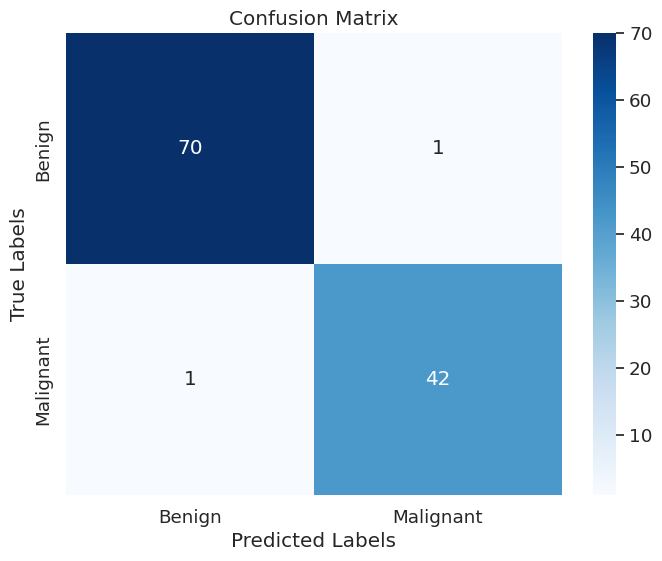

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()